In [1]:
from importlib.resources import path
import pandas as pd
import matplotlib.pyplot as plt
import STRINGdb

STRINGdb.init(12.0)

In [4]:
markers = pd.read_csv(path(STRINGdb.dataset,'genes.csv'), index_col=0)
# some mouse genes
markers = markers[markers['avg_logFC'].abs()>=1]
# will download data file when first run .map_id_local()
ids = STRINGdb.Meta(10090, idents=markers.index).map_id_local()
stringids =  markers.join(ids, how='right')
stringids

Conversion rate is: 0.9259259259259259 !


,p_val,avg_logFC,pct.1,pct.2,p_val_adj,pct_FC,#string_protein_id
alias,,,,,,,
Actn1,5.834946e-105,-1.024689,0.068,0.329,1.549528e-100,0.206687,10090.ENSMUSP00000021554
Alox5ap,5.947131e-89,-1.560391,0.260,0.472,1.579320e-84,0.550847,10090.ENSMUSP00000071130
Anxa1,2.142611e-70,-1.798337,0.162,0.362,5.689919e-66,0.447514,10090.ENSMUSP00000025561
Anxa2,2.208376e-141,-1.120541,0.094,0.413,5.864563e-137,0.227603,10090.ENSMUSP00000034756
Camp,2.855950e-28,-2.245043,0.354,0.471,7.584262e-24,0.751592,10090.ENSMUSP00000098843
Cd177,2.863306e-61,-1.485240,0.084,0.265,7.603796e-57,0.316981,10090.ENSMUSP00000064934
Chil3,4.231892e-43,-2.121139,0.378,0.519,1.123821e-38,0.728324,10090.ENSMUSP00000053923
Ckap4,4.568654e-75,-1.079445,0.217,0.414,1.213252e-70,0.524155,10090.ENSMUSP00000050336
Cr2,0.000000e+00,1.575142,0.820,0.323,0.000000e+00,2.538700,10090.ENSMUSP00000080938


In [5]:
idents = STRINGdb.Identifier(10090, idents=ids.values, sig=stringids[['p_val','avg_logFC']])

In [7]:
image = STRINGdb.network.Image(idents)
image.plot('png', save='demo.png')
image.add_holo(logFoldChange='avg_logFC')
image.plot('svg', save='demo.svg')
from IPython import display
display.display(display.SVG('demo.svg'))

Plot STRING network using igraph

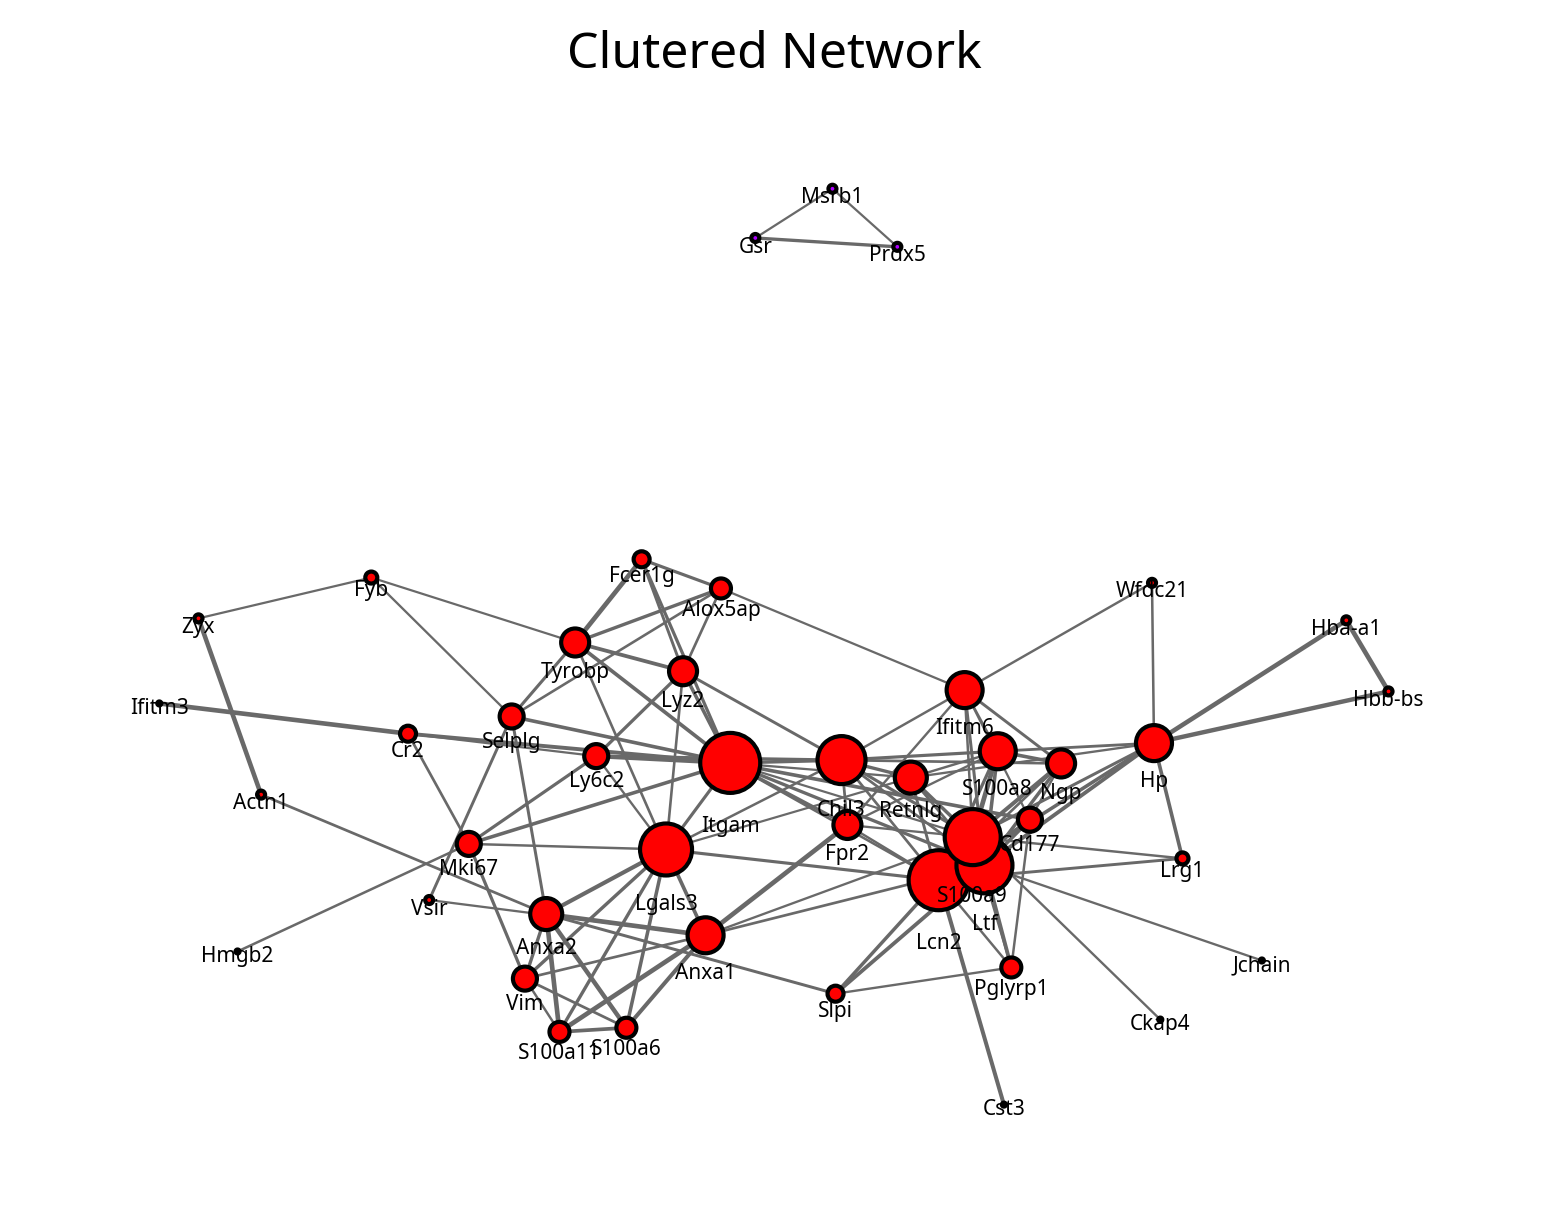

In [6]:
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Noto Sans', 'Devaju Sans']

interactions = STRINGdb.graph.Graph(idents)
df = interactions.subnetwork(thres=400, label=ids)
fig = interactions.plot(layout='auto')